# Exploración de datos

In [53]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import numpy.linalg as la
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.options.display.max_info_columns = 400

In [54]:
data_path = './data/'
id_train_csv = data_path + 'train_identity.csv'
tx_train_csv = data_path + 'train_transaction.csv'

In [55]:
id_df = pd.read_csv(id_train_csv)
id_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


## Overview

In [56]:
id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [57]:
tx_df = pd.read_csv(tx_train_csv)
rows, cols = tx_df.shape
tx_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,...,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
tx_df.info(verbose=True, null_counts=True)

<ipython-input-58-743e8a59082b>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  tx_df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           524834 non-null  float64
 12   addr2           524834 non-null  float64
 13   dist1           238269 non-null  float64
 14   dist2           37627 non-null   float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

## Resumen de variables

### isFraud: Desbalanceo de clases

La cantidad de transacciones fraudulentas es muy poca en comparación a las que no lo son. Las transacciones fraudulentas solo corresponden al 3.50% del total de transacciones. Se trata de un caso de detección de outliers

In [59]:
print('Conteo:')
print(tx_df.isFraud.value_counts())
print('\nPorcentajes:')
print(tx_df.isFraud.value_counts() / rows * 100)

Conteo:
0    569877
1     20663
Name: isFraud, dtype: int64

Porcentajes:
0    96.500999
1     3.499001
Name: isFraud, dtype: float64


### TransactionAmt: Sesgo de la variable

La distribución de esta variable está fuertemente sesgada a la izquierda. El histograma se encuentra en escala logarítmica

<AxesSubplot:xlabel='TransactionAmt', ylabel='Count'>

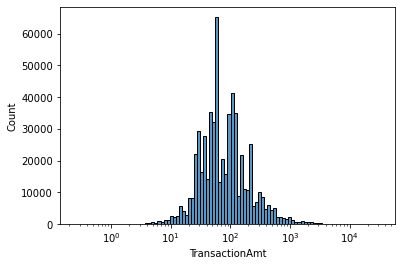

In [60]:
sb.histplot(tx_df.TransactionAmt, bins=100, log_scale=True)

c:\Users\alejo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TransactionAmt'>

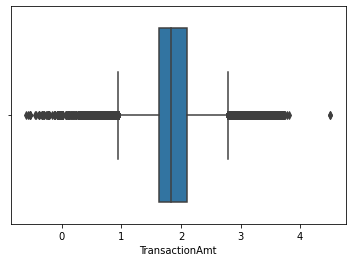

In [61]:
sb.boxplot(tx_df.TransactionAmt.transform(lambda tx: np.log10(tx)))

### ProductCD: Variable categórica

ProductCD, que corresponde al código del producto o servicio de la transacción, es una variable categórica con 5 valores distintos, donde la gran mayoría de las transacciones son de tipo W

In [62]:
print('Conteo:')
print(tx_df.ProductCD.value_counts())
print('\nPorcentajes:')
print(tx_df.ProductCD.value_counts() / rows * 100)

Conteo:
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

Porcentajes:
W    74.452196
C    11.602770
R     6.383818
H     5.592170
S     1.969045
Name: ProductCD, dtype: float64


### card1-6: Información de tarjetas

<AxesSubplot:xlabel='card1', ylabel='Count'>

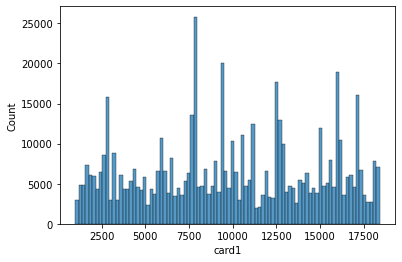

In [63]:
sb.histplot(tx_df.card1)

<AxesSubplot:xlabel='card2', ylabel='Count'>

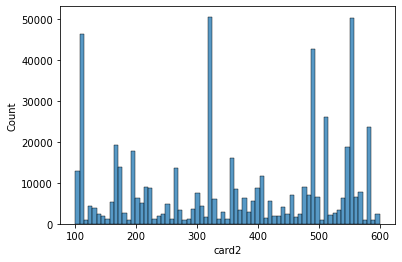

In [64]:
sb.histplot(tx_df.card2)

<AxesSubplot:xlabel='card3', ylabel='Count'>

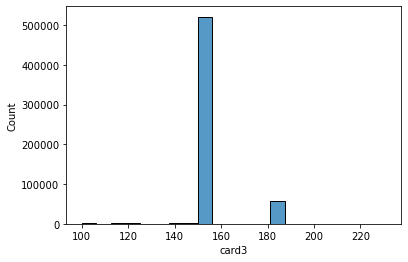

In [65]:
sb.histplot(tx_df.card3)

In [66]:
print('Conteo:')
print(tx_df.card4.value_counts())
print('\nPorcentajes:')
print(tx_df.card4.value_counts() / rows * 100)

Conteo:
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

Porcentajes:
visa                65.155112
mastercard          32.041352
american express     1.410235
discover             1.126257
Name: card4, dtype: float64


<AxesSubplot:xlabel='card5', ylabel='Count'>

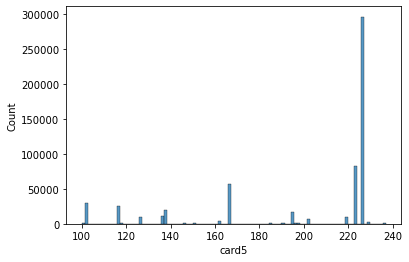

In [67]:
sb.histplot(tx_df.card5)

In [68]:
print('Conteo:')
print(tx_df.card6.value_counts())
print('\nPorcentajes:')
print(tx_df.card6.value_counts() / rows * 100)

Conteo:
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

Porcentajes:
debit              74.497578
credit             25.228774
debit or credit     0.005080
charge card         0.002540
Name: card6, dtype: float64


# Limpieza

Eliminar columnas que tengan mas del 10% de valores nulos

In [69]:
thresh_col = tx_df.shape[0]*0.9
tx_df.dropna(axis=1, thresh=thresh_col, inplace=True)
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 112 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   C1              590540 non-null  float64
 12   C2              590540 non-null  float64
 13   C3              590540 non-null  float64
 14   C4              590540 non-null  float64
 15   C5              590540 non-null  float64
 16   C6              590540 non-null  flo

Eliminar registros que tengan más de 10% de valores nulos

In [70]:
tx_df.dropna(axis=0, inplace=True)
tx_df.reset_index(drop=True, inplace=True)
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578081 entries, 0 to 578080
Data columns (total 112 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   578081 non-null  int64  
 1    isFraud         578081 non-null  int64  
 2    TransactionDT   578081 non-null  int64  
 3    TransactionAmt  578081 non-null  float64
 4    ProductCD       578081 non-null  object 
 5    card1           578081 non-null  int64  
 6    card2           578081 non-null  float64
 7    card3           578081 non-null  float64
 8    card4           578081 non-null  object 
 9    card5           578081 non-null  float64
 10   card6           578081 non-null  object 
 11   C1              578081 non-null  float64
 12   C2              578081 non-null  float64
 13   C3              578081 non-null  float64
 14   C4              578081 non-null  float64
 15   C5              578081 non-null  float64
 16   C6              578081 non-null  flo

## Transformación de variables categóricas

In [71]:
tx_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,...,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000
3,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578076,3577534,0,15811030,67.505,C,5812,408.0,185.0,mastercard,224.0,debit,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
578077,3577536,0,15811049,39.500,W,10444,225.0,150.0,mastercard,224.0,debit,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
578078,3577537,0,15811079,30.950,W,12037,595.0,150.0,mastercard,224.0,debit,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
578079,3577538,0,15811088,117.000,W,7826,481.0,150.0,mastercard,224.0,debit,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,117.000000,2903.500000,117.000000,117.0,669.5,0.0,117.0,317.5,669.5,317.5,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [72]:
tx_df = pd.get_dummies(tx_df, drop_first=True)

In [73]:
def multiple_corr(X):
    S = X.cov()
    S_inv = la.inv(S)
    R2 = 1 - 1 / (np.diag(S) * np.diag(S_inv))
    return pd.Series(R2, index=X.columns)

In [74]:
X = tx_df.drop('isFraud', axis=1)
multiple_corr(X).sort_values(ascending=False)

V97               1.000000
V103              1.000000
V96               1.000000
V102              1.000000
V95               1.000000
                    ...   
TransactionAmt    0.159501
C3                0.119414
card2             0.033121
card1             0.031420
V305              0.000202
Length: 118, dtype: float64

## Proceso iterativo para remover variables redundantes

In [75]:
X_c = X.copy()
while True:
    R2 = multiple_corr(X_c).sort_values(ascending=False)
    if R2[0] > 0.7:
        X_c.drop(R2.index[0], axis=1, inplace=True)
    else:
        break

In [76]:
X_c

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C3,C5,C7,D1,V98,V101,V104,V107,V109,V110,V112,V114,V118,V121,V122,V123,V124,V130,V135,V281,V283,V285,V286,V288,V290,V291,V301,V303,V305,V311,V312,V313,V314,V319,ProductCD_H,ProductCD_R,ProductCD_S,card4_discover,card4_mastercard,card6_credit,card6_debit or credit
0,86401,29.000,2755,404.0,150.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,1,0
1,86469,59.000,4663,490.0,150.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0
2,86499,50.000,18132,567.0,150.0,117.0,0.0,0.0,0.0,112.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,354.0,0.000000,0.0,0.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,135.0,0.0,0.0,0.000000,0,0,0,0,1,0,0
3,86506,50.000,4497,514.0,150.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,1,1,0
4,86510,49.000,5937,555.0,150.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578076,15811030,67.505,5812,408.0,185.0,224.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0
578077,15811049,39.500,10444,225.0,150.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0
578078,15811079,30.950,12037,595.0,150.0,224.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0
578079,15811088,117.000,7826,481.0,150.0,224.0,0.0,0.0,0.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,117.0,0.000000,0.0,7.0,5.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,117.0,317.5,669.5,0.000000,0,0,0,0,1,0,0


In [77]:
new_df = X_c.copy()
new_df['isFraud'] = tx_df.isFraud
pd.options.display.max_columns = 50
new_df

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C3,C5,C7,D1,V98,V101,V104,V107,V109,V110,V112,V114,V118,V121,V122,V123,V124,V130,V135,V281,V283,V285,V286,V288,V290,V291,V301,V303,V305,V311,V312,V313,V314,V319,ProductCD_H,ProductCD_R,ProductCD_S,card4_discover,card4_mastercard,card6_credit,card6_debit or credit,isFraud
0,86401,29.000,2755,404.0,150.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,1,0,0
1,86469,59.000,4663,490.0,150.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,0
2,86499,50.000,18132,567.0,150.0,117.0,0.0,0.0,0.0,112.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,354.0,0.000000,0.0,0.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,135.0,0.0,0.0,0.000000,0,0,0,0,1,0,0,0
3,86506,50.000,4497,514.0,150.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,1,1,0,0
4,86510,49.000,5937,555.0,150.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578076,15811030,67.505,5812,408.0,185.0,224.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0,0
578077,15811049,39.500,10444,225.0,150.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0,0
578078,15811079,30.950,12037,595.0,150.0,224.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,1,0,0,0
578079,15811088,117.000,7826,481.0,150.0,224.0,0.0,0.0,0.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,117.0,0.000000,0.0,7.0,5.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,117.0,317.5,669.5,0.000000,0,0,0,0,1,0,0,0


In [78]:
new_df.isFraud.value_counts()

0    558065
1     20016
Name: isFraud, dtype: int64

## PCA con Dataset completo

In [79]:
pca = PCA(3)

In [80]:
pca_fit = pca.fit(X.dropna())

In [81]:
pca_fit.explained_variance_ratio_

array([9.99988433e-01, 5.61339564e-06, 4.62802454e-06])